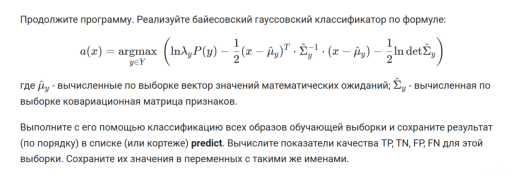

In [3]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/4_5_1..png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

In [12]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = -0.5
D2 = 2.0
mean2 = [0, 2]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N1 = 500
N2 = 1000
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

# вычисление оценок МО и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N1, np.dot(a[0], a[1]) / N1],
                [np.dot(a[1], a[0]) / N1, np.dot(a[1], a[1]) / N1]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N2, np.dot(a[0], a[1]) / N2],
                [np.dot(a[1], a[0]) / N2, np.dot(a[1], a[1]) / N2]])

# для гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

bayes = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(np.linalg.det(v))
predict = [] # список классифицирующих образов
for X in data_x:
    a = np.argmax([bayes(X, VV1, mm1, L1, Py1), bayes(X, VV2, mm2, L2, Py2)]) * 2 - 1
    predict.append(a)

TP = sum([1 if predict[i] == data_y[i] and predict[i] == 1 else 0 for i in range(len(data_y))])
TN = sum([1 if predict[i] == data_y[i] and predict[i] == -1 else 0 for i in range(len(data_y))])
FP = sum([1 if predict[i] != data_y[i] and predict[i] == 1 else 0 for i in range(len(data_y))])
FN = sum([1 if predict[i] != data_y[i] and predict[i] == -1 else 0 for i in range(len(data_y))])
TP, TN, FP, FN

(947, 491, 9, 53)

In [14]:
# альтернативное решение (лучшее по мне)

import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = -0.5
D2 = 2.0
mean2 = [0, 2]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N1 = 500
N2 = 1000
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

# вычисление оценок МО и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N1, np.dot(a[0], a[1]) / N1],
                [np.dot(a[1], a[0]) / N1, np.dot(a[1], a[1]) / N1]])

VV1_inv = np.linalg.inv(VV1)
VV1_det = np.linalg.det(VV1)

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N2, np.dot(a[0], a[1]) / N2],
                [np.dot(a[1], a[0]) / N2, np.dot(a[1], a[1]) / N2]])
VV2_inv = np.linalg.inv(VV2)
VV2_det = np.linalg.det(VV2)

# для гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

# здесь продолжайте программу
model = lambda l, py, v_det, v_inv, x, m: np.log(l * py) - 0.5 * (x - m) @ v_inv @ (x - m).T - 0.5 * np.log(v_det)

predict = np.array([np.argmax([model(L1, Py1, VV1_det, VV1_inv, x, mm1), model(L2, Py2, VV2_det, VV2_inv, x, mm2)]) * 2 - 1 for x in data_x])

TP = predict[(predict == 1) & (data_y == 1)].size
FP = predict[(predict == 1) & (data_y == -1)].size
TN = predict[(predict == -1) & (data_y == -1)].size
FN = predict[(predict == -1) & (data_y == 1)].size
TP, TN, FP, FN

(947, 491, 9, 53)